# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_sd, y_train1)
y_pred_lim = model.predict(X_test_sd)# Machine Learning Model for Classification 
This notebook is prepared by Ridzuan

## Import and Download The Data

In [367]:
import pandas as pd
import numpy as np

In [368]:
# Download the data
import os
import tarfile
import urllib

DATA_URL = "https://wiki.cancerimagingarchive.net/download/attachments/16056854/NSCLC%20Radiomics%20Lung1.clinical-version3-Oct%202019.csv?version=1&modificationDate=1572013183040&api=v2"
DOWNLOAD_PATH = "data.csv"

def fetch_data(data_url = DATA_URL, download_path = DOWNLOAD_PATH):
    urllib.request.urlretrieve(data_url, download_path)

In [369]:
# Load the data to Panda
import pandas as pd
def load_data(download_path = DOWNLOAD_PATH):
    return pd.read_csv(download_path)

In [370]:
fetch_data()
raw_data = load_data()

# Understand The Data

In [371]:
raw_data.head()

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


In [372]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               400 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         380 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 33.1+ KB


In [373]:
# Check Is there any  Non Avialable Data 
display(raw_data.isna().any())

PatientID           False
age                  True
clinical.T.Stage     True
Clinical.N.Stage    False
Clinical.M.Stage    False
Overall.Stage        True
Histology            True
gender              False
Survival.time       False
deadstatus.event    False
dtype: bool

In [374]:
# Removing Non Availabile Datas from the raw
raw_data = raw_data.fillna(-1)

In [375]:
# Check Is there any Non Available Data 
display(raw_data.isna().any())

PatientID           False
age                 False
clinical.T.Stage    False
Clinical.N.Stage    False
Clinical.M.Stage    False
Overall.Stage       False
Histology           False
gender              False
Survival.time       False
deadstatus.event    False
dtype: bool

In [376]:
raw_data['deadstatus.event'].value_counts()

1    373
0     49
Name: deadstatus.event, dtype: int64

<AxesSubplot:xlabel='deadstatus.event', ylabel='count'>

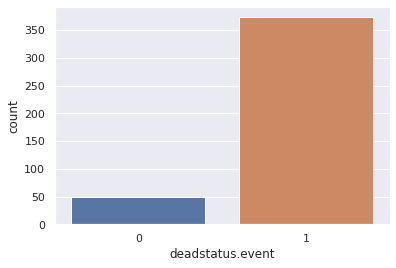

In [377]:
# Now lets check the class distributions
import seaborn as sns
sns.countplot(x="deadstatus.event",data=raw_data)

In [378]:
raw_data['Survival.time'].value_counts()

303     4
515     3
220     3
98      3
249     3
       ..
336     1
337     1
1362    1
1738    1
512     1
Name: Survival.time, Length: 377, dtype: int64

In [379]:
raw_data['Histology'].value_counts()

squamous cell carcinoma    152
large cell                 114
nos                         63
adenocarcinoma              51
-1                          42
Name: Histology, dtype: int64

<AxesSubplot:xlabel='Histology', ylabel='count'>

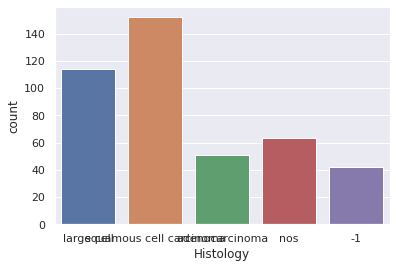

In [380]:
sns.countplot(x="Histology",data=raw_data)

<AxesSubplot:xlabel='gender', ylabel='count'>

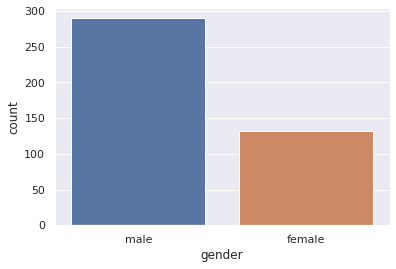

In [381]:
sns.countplot(x="gender",data=raw_data)

In [382]:
raw_data['gender'].value_counts()

male      290
female    132
Name: gender, dtype: int64

In [383]:
pd.crosstab(index=raw_data['gender'], columns=raw_data['deadstatus.event'])

deadstatus.event,0,1
gender,,
female,22,110
male,27,263


In [384]:
pd.crosstab(index=raw_data['gender'], columns=raw_data['clinical.T.Stage'])

clinical.T.Stage,-1.0,1.0,2.0,3.0,4.0,5.0
gender,,,,,,
female,1,35,45,15,35,1
male,0,58,111,38,82,1


<AxesSubplot:xlabel='age'>

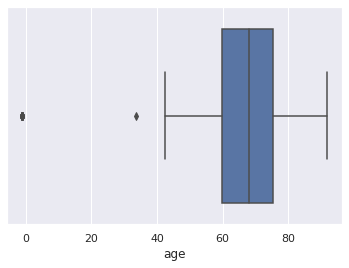

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.boxplot(x=raw_data.age)

<AxesSubplot:xlabel='clinical.T.Stage', ylabel='count'>

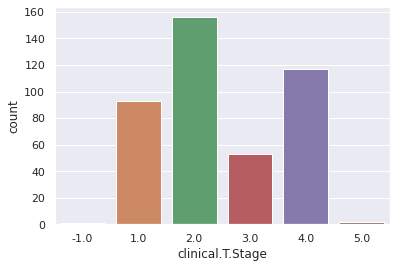

In [386]:
raw_data["clinical.T.Stage"].value_counts()
sns.countplot(x="clinical.T.Stage",data=raw_data)

<AxesSubplot:xlabel='Clinical.M.Stage', ylabel='count'>

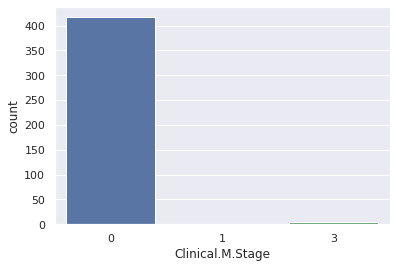

In [387]:
raw_data["Clinical.M.Stage"].value_counts()
sns.countplot(x="Clinical.M.Stage",data=raw_data)
# There are too many 0 stage in this attribute. We might need to drop this feature.

<AxesSubplot:xlabel='Clinical.N.Stage', ylabel='count'>

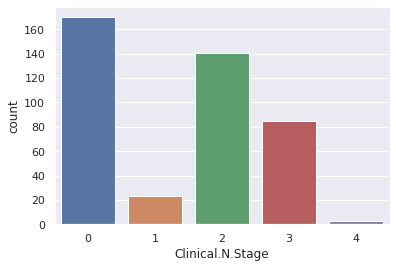

In [388]:
raw_data["Clinical.N.Stage"].value_counts()
sns.countplot(x="Clinical.N.Stage",data=raw_data)

In [389]:
#Find the correlation of each coffecients
raw_data.corr()

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,deadstatus.event
age,1.000000,0.026531,-0.096175,-0.024185,-0.040476,0.056673
clinical.T.Stage,0.026531,1.000000,0.034110,0.055951,0.017221,-0.052694
Clinical.N.Stage,-0.096175,0.034110,1.000000,0.095097,-0.046084,-0.040022
Clinical.M.Stage,-0.024185,0.055951,0.095097,1.000000,-0.003276,0.037913
Survival.time,-0.040476,0.017221,-0.046084,-0.003276,1.000000,-0.655487
deadstatus.event,0.056673,-0.052694,-0.040022,0.037913,-0.655487,1.000000


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='clinical.T.Stage', ylabel='age'>,
        <AxesSubplot:xlabel='Clinical.N.Stage', ylabel='age'>,
        <AxesSubplot:xlabel='Clinical.M.Stage', ylabel='age'>,
        <AxesSubplot:xlabel='Survival.time', ylabel='age'>,
        <AxesSubplot:xlabel='deadstatus.event', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='clinical.T.Stage'>,
        <AxesSubplot:xlabel='clinical.T.Stage', ylabel='clinical.T.Stage'>,
        <AxesSubplot:xlabel='Clinical.N.Stage', ylabel='clinical.T.Stage'>,
        <AxesSubplot:xlabel='Clinical.M.Stage', ylabel='clinical.T.Stage'>,
        <AxesSubplot:xlabel='Survival.time', ylabel='clinical.T.Stage'>,
        <AxesSubplot:xlabel='deadstatus.event', ylabel='clinical.T.Stage'>],
       [<AxesSubplot:xlabel='age', ylabel='Clinical.N.Stage'>,
        <AxesSubplot:xlabel='clinical.T.Stage', ylabel='Clinical.N.Stage'>,
        <AxesSubplot:xlabel='Clinical.N.Stage', ylabel='C

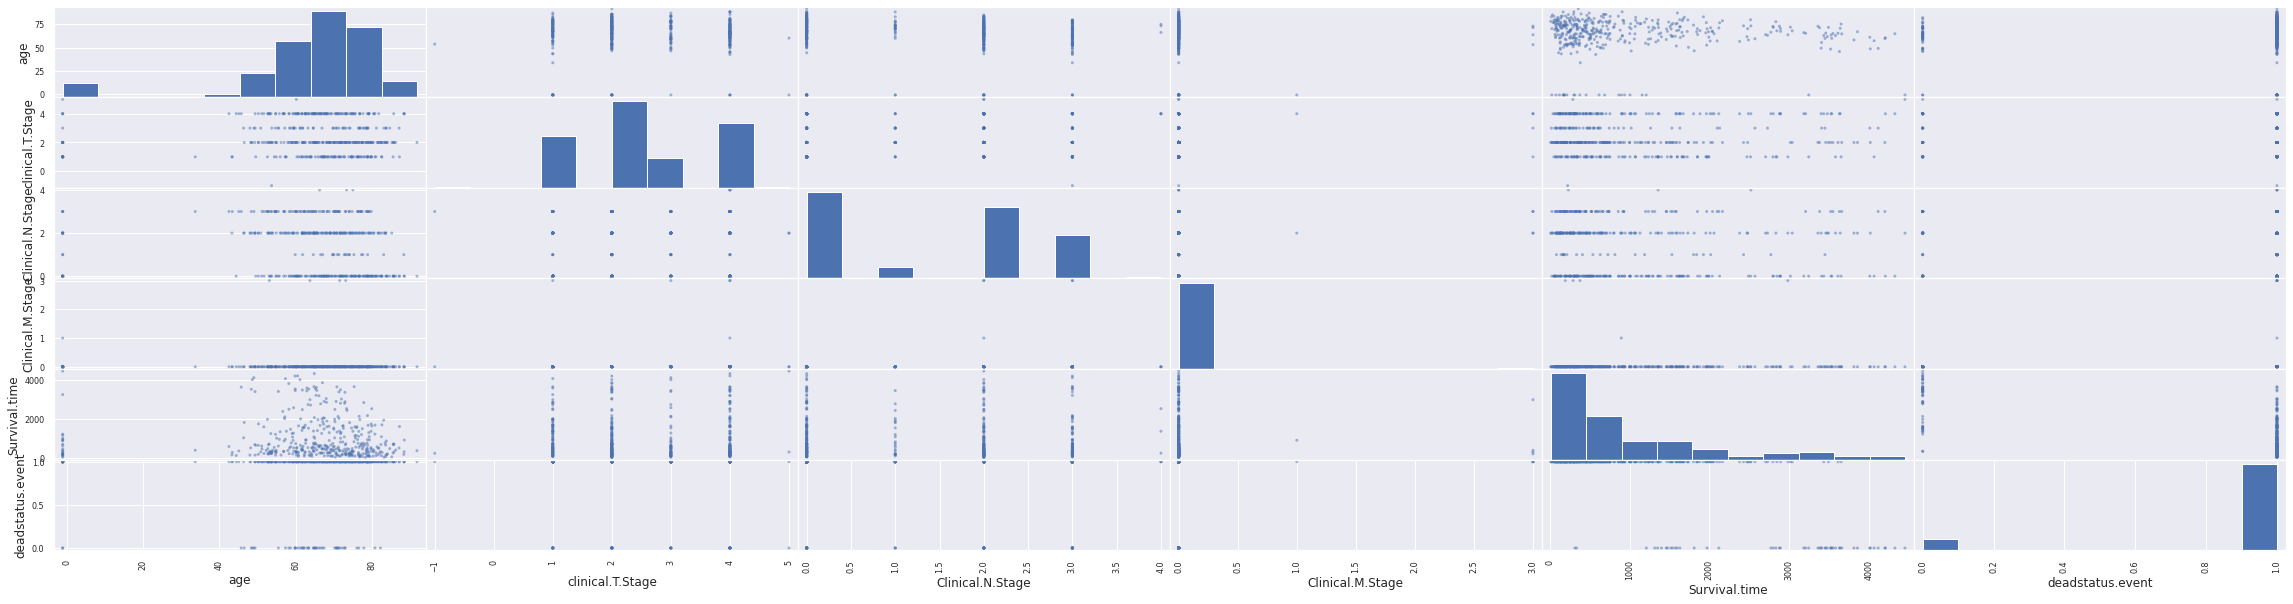

In [390]:
# Correlation using pandas

from pandas.plotting import scatter_matrix

attributes = ["age", 
              "clinical.T.Stage", 
              "Clinical.N.Stage", "Clinical.M.Stage", 
              "Survival.time", 
              "deadstatus.event"
             ]
scatter_matrix(raw_data[attributes], figsize=(40, 10))

# scatterplot of the dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='Survival.time'>

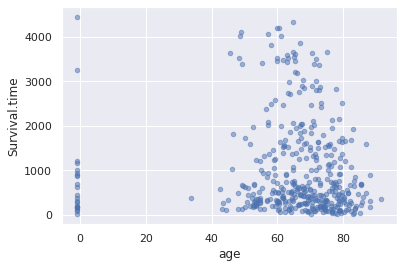

In [391]:
# Plot
raw_data.plot.scatter(x='age', y='Survival.time', alpha=0.5)

In [392]:
# make dictionary for string values
string_val_keys = ['Overall.Stage', 'Histology', 'gender']
dictionary = {}
for key in string_val_keys:
    classes = list(raw_data[key].unique())
    if -1 in classes:
        classes.remove(-1)
    dictionary[key] = classes
dictionary

{'Overall.Stage': ['IIIb', 'I', 'II', 'IIIa'],
 'Histology': ['large cell',
  'squamous cell carcinoma',
  'adenocarcinoma',
  'nos'],
 'gender': ['male', 'female']}

In [393]:
# Seperate dependent variables from the data set
# seperate independent variable named as data and dependent variable name lablels
data, labels1, labels2 = [], [], []
for i in range(len(raw_data.values)):
    if raw_data['deadstatus.event'][i] == -1:
        continue
    data_line = []
    for key in raw_data.keys()[1:]:
        if raw_data[key][i] == -1:
            data_line.append(-1)
            continue
        if key in string_val_keys:
            data_line.append(dictionary[key].index(raw_data[key][i]))
        else:
            data_line.append(raw_data[key][i])
    data.append(data_line[:-2])
    # Target is the last two columns
    labels1.append(data_line[-2:-1][0]) # Survival.time
    labels2.append(data_line[-1]) # deadstatus.event
print('There are %d items in the given dataset' % len(data))
raw_data.info()

There are 422 items in the given dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               422 non-null    float64
 2   clinical.T.Stage  422 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     422 non-null    object 
 6   Histology         422 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 33.1+ KB


In [394]:
#Split the data nd labels set into 80% as training and 20% as testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train1, y_test1 = train_test_split(data, labels1, test_size=0.2, random_state=42)
X_train, X_test, y_train2, y_test2 = train_test_split(data, labels2, test_size=0.2, random_state=42)
print(f'There are {len(X_train)} items in the train dataset')
print(f'There are {len(X_test)} items in the test dataset')

There are 337 items in the train dataset
There are 85 items in the test dataset


In [395]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

# Logistic Regression Model to predict deadstatus.event

In [396]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sd, y_train2)

LogisticRegression(random_state=0)

In [397]:
y_pred_lgm = classifier.predict(X_test_sd)

In [398]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_lgm = confusion_matrix(y_test2, y_pred_lgm)
print(cm_lgm)


[[ 0 12]
 [ 0 73]]


Text(66.5, 0.5, 'Truth')

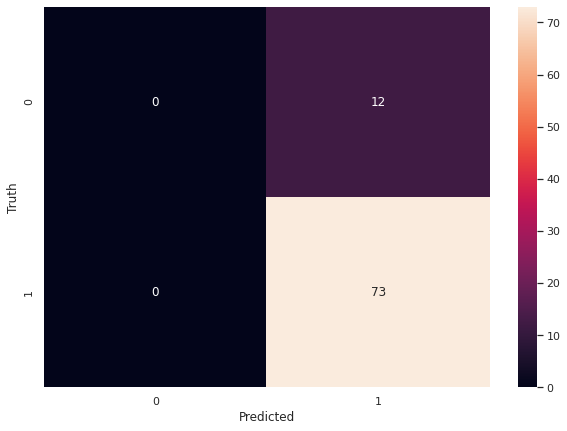

In [399]:
import matplotlib.pyplot as plt  
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
plt.figure(figsize = (10,7))
sns.heatmap(cm_lgm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [400]:
acc_glm=accuracy_score(y_test2, y_pred_lgm)*100
print(acc_glm)

85.88235294117646


# K-NN Algorithom

Steps
1.Create new data set without categorical variable and assigned name as data
2.Create new data set Only with categorical variable and assigned name as lables
3.Split the data set into 80% as Training and assigned name as x_train as well as 20% as Testing & Assigned name as x_test
4.Split the labels set into 80% as Training and assigned name as y_train as well as 20 as Testing & Assigned name as y_test


In [401]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
x_train_normal = scaler.fit_transform(X_train)
x_test_normal = scaler.fit_transform(X_test)

In [402]:
from sklearn import neighbors
n_neighbors = 10
weights = 'uniform'

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(x_train_normal,y_train)

NameError: name 'y_train' is not defined

In [ ]:
y_pre_knn= clf.predict(x_test_normal)
y_pre_knn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test2, y_pre_knn))


In [ ]:
cm_knn = confusion_matrix(y_test2, y_pre_knn)
cm_knn


In [ ]:
import matplotlib.pyplot as plt  
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
plt.figure(figsize = (10,8))
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test2, y_pre_knn)*100
print(acc_knn)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_sd,y_train2)


In [ ]:
y_pred_DE = clf.predict(X_test_sd)
y_pred_DE

In [ ]:
feature_cols=['age','clinical.T.Stage','clinical.N.Stage','clinical.M.Stage','Overall.Stage','Histology','gender','Survival.time']

In [ ]:
cm_tree = confusion_matrix(y_test2, y_pred_DE)
print(cm_tree)


In [ ]:
import matplotlib.pyplot as plt  
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
plt.figure(figsize = (10,7))
sns.heatmap(cm_tree, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
acc_dtree=accuracy_score(y_test2, y_pred_DE)*100
print(acc_dtree)

# Nive Bayes Model


In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_sd, y_train2)

In [ ]:
#Predicting the Data Test set results
y_pred_NB = clf.predict(X_test_sd)
y_pred_NB 

In [ ]:
cm_NB = confusion_matrix(y_test2, y_pred_NB)
print(cm_NB)


In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_NB, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
acc_nb=accuracy_score(y_test2, y_pred_NB)*100
print(acc_nb)

# RandomForest Model

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_sd, y_train2)

In [ ]:
#Predicting the Data Test set results
y_pred_RF = clf.predict(X_test_sd)
y_pred_RF 

In [ ]:
cm_RF = confusion_matrix(y_test2, y_pred_NB)
print(cm_RF)

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_RF, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
acc_rf=accuracy_score(y_test2, y_pred_RF)*100
print(acc_rf)

# Support Vector Machine (SVM)

In [ ]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_sd, y_train2)

In [ ]:
#Predicting the Data Test set results
y_pred_SVM = clf.predict(X_test_sd)
y_pred_SVM 

In [ ]:
cm_SVM = confusion_matrix(y_test2, y_pred_SVM)
print(cm_SVM)

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_SVM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
acc_svm=accuracy_score(y_test, y_pred_SVM)*100
print(acc_svm)

# compare The All Model using sklearn

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
#Comparing classifiers via voting
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard'
)
voting_clf.fit(X_train_sd, y_train2)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_sd, y_train2)
    y_pred = clf.predict(X_test_sd)
    print(clf.__class__.__name__, accuracy_score(y_test2, y_pred))

In [ ]:
#I have used Logistic Regression, KNN, Decission Tree, Random Forest and SVM for analysis the data 
# Accuracy of Each model
#Accuracy of Logistic Regression =89.41176470588236
#Accuracy of knn=87.05882352941177
#Accuracy of Decision Tree=89.41176470588236
#Accuracy of Nive Bayes =85.88235294117646
#Accuracy of Random Forest=85.88235294117646
#Accuracy Of SVM=85.88235294117646
#Here, Logistic Regression model Accuracy higher than other Machine learning model 
#so, We could suggest Logistic Regression Model best for this Prediction 

In [ ]:
#Advantage of Logistic Regression Model for This Analysis
# It has good Accuracy among them Moreover#
#It has Good sensitivity to predict which pation has deadstatus.event ==1 So, It's good model for that

# Predicting Survival.time

In [ ]:
# Seperate dependent variables from the data set
# seperate independent variable named as data and dependent variable name lablels
data, labels1, labels2 = [], [], []
for i in range(len(raw_data.values)):
    if raw_data['deadstatus.event'][i] == -1:
        continue
    data_line = []
    for key in raw_data.keys()[1:]:
        if raw_data[key][i] == -1:
            data_line.append(-1)
            continue
        if key in string_val_keys:
            data_line.append(dictionary[key].index(raw_data[key][i]))
        else:
            data_line.append(raw_data[key][i])
    data.append(data_line[0:1])
    # Target is the last two columns
    labels1.append(data_line[-2:-1][0]) # Survival.time
    labels2.append(data_line[-1]) # deadstatus.event
print('There are %d items in the given dataset' % len(data))


#Split the data nd labels set into 80% as training and 20% as testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train1, y_test1 = train_test_split(data, labels1, test_size=0.2, random_state=42)
X_train, X_test, y_train2, y_test2 = train_test_split(data, labels2, test_size=0.2, random_state=42)
print(f'There are {len(X_train)} items in the train dataset')
print(f'There are {len(X_test)} items in the test dataset')

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train1)
y_pred_lim = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

print(f"Coefficients: {model.coef_}")
print(f"Coefficients of determination: {r2_score(y_test1, y_pred_lim)}")
print(f"Mean Squred Error: {mean_squared_error(y_test1, y_pred_lim)}")
print(f"Mean Absolute Error: {mean_squared_error(y_test1, y_pred_lim)}")
print(f"Explained Variance Score: {explained_variance_score(y_test1, y_pred_lim)}")
print(len(X_test), len(y_test1), len(X_train), len(y_train1), len(y_pred_lim))
for i in range(len(y_test1)):
    print(X_test[i], y_test1[i], y_pred_lim[i], X_train[i], y_train1[i])
    
#print(len(y_pred_lim), len(y_test1))
